In [1]:
# Import the dependencies.

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

from citipy import citipy

# Import the requests library.

import requests

# Import the API key.

from config import weather_api_key

# Import the time library and the datetime module from the datetime library 

import time

from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)

lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)

lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.

coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.

for coordinate in coordinates:
    
    print(coordinate[0], coordinate[1])


-60.76608321163659 169.40650984437065
87.72079693592619 10.50918292785488
79.95292638369091 -1.0743469551737235
28.224991499685018 -79.64583124464778
-15.885831176652914 -105.71980814144582
-16.27558839381696 -55.30325066843987
-18.707574831651968 31.49351486748637
-3.1477305120833137 52.155424165956504
57.1646703937607 82.77528599047776
-1.8446198965286413 132.31907374984627
-85.12431061301488 45.41260677972687
5.87893888981111 26.8388554584522
74.56143542425647 -100.91241128309073
33.566897534184605 103.96578025199284
41.26236432220401 57.40211020170224
41.054317970774235 156.3337321196555
82.04598751501953 -105.6553359390746
40.009660840183955 109.6963095460975
-80.4172509899905 -2.583749473233439
58.39714919361779 -117.96324982326533
-84.4185265977613 -165.05310185651754
-39.14091359409436 -23.52744831530333
43.79891622258589 -100.61139015199424
7.739260037208723 124.6438002244401
5.096676941896973 47.92511486175002
-84.37311060063298 -119.81911227224188
-74.45749610758399 118.8975

-81.01497836188545 -117.33723218509715
44.73119833202193 -78.32722717560964
45.44933628801937 -142.39025363974895
-14.821293699950758 43.4004505861555
2.6876399207638144 -10.840713549354007
-31.946649169462255 149.017341988871
64.12654428929784 179.92490071490016
-16.40934163961147 -57.676162886710145
8.780086514804992 -128.77970825809825
-19.924238524963116 -125.50824901553787
-85.91085895487699 -13.826100292203364
8.752402394740884 62.98890772594078
-10.424082693626232 -88.84885966304483
26.05853131771292 -114.40460118922648
47.566897060878944 49.78220147086773
-59.123354807421975 -144.58684747308084
41.62883116282302 26.954939760353767
-69.44801710067331 -20.254084778910112
-89.68662449906634 -168.63510037560775
50.79769150047946 5.4028967435095865
-54.65512725926331 1.517953899392154
-43.461709410274416 123.1381969952655
-88.00532302140536 177.18946934749124
-43.78606890827722 -146.95673183279547
85.03758630116107 -85.18467274012268
-73.57173153495745 -67.1797576555709
70.078652209

In [5]:
# Create a list for holding the cities.

cities = []

# Identify the nearest city for each latitude and longitude combination.

for coordinate in coordinates:
    
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    
    if city not in cities:
        
        cities.append(city)
        
# Print the city count to confirm sufficient count.

len(cities)

610

In [6]:
# Starting URL for Weather Map API Call.

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [7]:
# Create an empty list to hold the weather data.

city_data = []

# Print the beginning of the logging.

print("Beginning Data Retrieval     ")

print("-----------------------------")

# Create counters.

record_count = 1

set_count = 1

# Loop through all the cities in our list.

for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    
    if (i % 50 == 0 and i >= 50):
        
        set_count += 1
        
        record_count = 1
        
        time.sleep(60)

    # Create endpoint URL with each city.
    
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.

for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    
    if (i % 50 == 0 and i >= 50):
        
        set_count += 1
        
        record_count = 1
        
        time.sleep(60)

    # Create endpoint URL with each city.
    
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    
    record_count += 1
    
    # Run an API request for each of the cities.
    
    try:
        
        # Parse the JSON and retrieve data.
        
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        
        city_lat = city_weather["coord"]["lat"]
        
        city_lng = city_weather["coord"]["lon"]
        
        city_max_temp = city_weather["main"]["temp_max"]
        
        city_humidity = city_weather["main"]["humidity"]
        
        city_clouds = city_weather["clouds"]["all"]
        
        city_wind = city_weather["wind"]["speed"]
        
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.

    except:
        
        print("City not found. Skipping...")
        
        pass

# Indicate that Data Loading is complete.

print("-----------------------------")

print("Data Retrieval Complete      ")

print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | bluff
Processing Record 2 of Set 13 | barentsburg
City not found. Skipping...
Processing Record 3 of Set 13 | sebastian
Processing Record 4 of Set 13 | puerto ayora
Processing Record 5 of Set 13 | jaciara
Processing Record 6 of Set 13 | marondera
Processing Record 7 of Set 13 | victoria
Processing Record 8 of Set 13 | podgornoye
Processing Record 9 of Set 13 | sorong
Processing Record 10 of Set 13 | port alfred
Processing Record 11 of Set 13 | obo
Processing Record 12 of Set 13 | yellowknife
Processing Record 13 of Set 13 | jiangyou
Processing Record 14 of Set 13 | akdepe
Processing Record 15 of Set 13 | sentyabrskiy
City not found. Skipping...
Processing Record 16 of Set 13 | dongsheng
Processing Record 17 of Set 13 | hermanus
Processing Record 18 of Set 13 | high level
Processing Record 19 of Set 13 | mataura
Processing Record 20 of Set 13 | arraial do cabo
Processing Record 21 of Set 13 | pie

Processing Record 30 of Set 16 | sokolo
Processing Record 31 of Set 16 | luderitz
Processing Record 32 of Set 16 | grand island
Processing Record 33 of Set 16 | pisco
Processing Record 34 of Set 16 | floro
Processing Record 35 of Set 16 | matadi
Processing Record 36 of Set 16 | bahir dar
Processing Record 37 of Set 16 | pitimbu
Processing Record 38 of Set 16 | chokurdakh
Processing Record 39 of Set 16 | conceicao do araguaia
Processing Record 40 of Set 16 | ostrovnoy
Processing Record 41 of Set 16 | havelock
Processing Record 42 of Set 16 | udachnyy
Processing Record 43 of Set 16 | chapais
Processing Record 44 of Set 16 | severo-kurilsk
Processing Record 45 of Set 16 | narrabri
Processing Record 46 of Set 16 | alice springs
Processing Record 47 of Set 16 | north bend
Processing Record 48 of Set 16 | am timan
Processing Record 49 of Set 16 | atar
Processing Record 50 of Set 16 | aktau
Processing Record 1 of Set 17 | nhulunbuy
Processing Record 2 of Set 17 | georgetown
Processing Record 

Processing Record 17 of Set 20 | waingapu
Processing Record 18 of Set 20 | vanimo
Processing Record 19 of Set 20 | hauterive
Processing Record 20 of Set 20 | tagusao
Processing Record 21 of Set 20 | jieshi
Processing Record 22 of Set 20 | rocha
Processing Record 23 of Set 20 | muroto
Processing Record 24 of Set 20 | vila franca do campo
Processing Record 25 of Set 20 | hwange
Processing Record 26 of Set 20 | bambous virieux
Processing Record 27 of Set 20 | machaneng
Processing Record 28 of Set 20 | roseburg
Processing Record 29 of Set 20 | mortka
Processing Record 30 of Set 20 | portland
Processing Record 31 of Set 20 | saleaula
City not found. Skipping...
Processing Record 32 of Set 20 | uruzgan
Processing Record 33 of Set 20 | nador
Processing Record 34 of Set 20 | cumberland
Processing Record 35 of Set 20 | irece
Processing Record 36 of Set 20 | chuy
Processing Record 37 of Set 20 | byron bay
Processing Record 38 of Set 20 | laguna
Processing Record 39 of Set 20 | buin
Processing Re

Processing Record 5 of Set 24 | northam
Processing Record 6 of Set 24 | x-can
City not found. Skipping...
Processing Record 7 of Set 24 | khani
Processing Record 8 of Set 24 | nishihara
Processing Record 9 of Set 24 | sundargarh
Processing Record 10 of Set 24 | antofagasta
Processing Record 11 of Set 24 | kadykchan
City not found. Skipping...
Processing Record 12 of Set 24 | oktyabrskiy
Processing Record 13 of Set 24 | jaranwala
Processing Record 14 of Set 24 | brazzaville
Processing Record 15 of Set 24 | reichenbach
Processing Record 16 of Set 24 | stornoway
Processing Record 17 of Set 24 | wukari
Processing Record 18 of Set 24 | mizan teferi
Processing Record 19 of Set 24 | moose factory
Processing Record 20 of Set 24 | novoagansk
Processing Record 21 of Set 24 | kampene
Processing Record 22 of Set 24 | ust-kut
Processing Record 23 of Set 24 | tapaua
City not found. Skipping...
Processing Record 24 of Set 24 | nyurba
Processing Record 25 of Set 24 | dosso
Processing Record 26 of Set 

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.

city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,47.80,87,98,15.90,NZ,2022-07-29 01:56:03
1,Sebastian,35.1668,-94.2669,88.39,64,38,4.70,US,2022-07-29 01:56:03
2,Puerto Ayora,-0.7393,-90.3518,69.55,94,58,4.00,EC,2022-07-29 01:56:04
3,Jaciara,-15.9653,-54.9683,70.68,33,67,2.89,BR,2022-07-29 01:56:04
4,Marondera,-18.1853,31.5519,39.22,61,0,4.21,ZW,2022-07-29 01:56:05
5,Victoria,22.2855,114.1577,93.96,67,99,5.99,HK,2022-07-29 01:54:18
6,Podgornoye,51.7350,39.1496,64.62,94,0,6.71,RU,2022-07-29 01:56:05
7,Sorong,-0.8833,131.2500,81.19,81,38,5.88,ID,2022-07-29 01:56:06
8,Port Alfred,-33.5906,26.8910,67.17,59,0,4.00,ZA,2022-07-29 01:52:31
9,Obo,5.3998,26.4869,65.39,99,100,3.53,CF,2022-07-29 01:56:07


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
                    
city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bluff,NZ,2022-07-29 01:56:03,-46.6000,168.3333,47.80,87,98,15.90
1,Sebastian,US,2022-07-29 01:56:03,35.1668,-94.2669,88.39,64,38,4.70
2,Puerto Ayora,EC,2022-07-29 01:56:04,-0.7393,-90.3518,69.55,94,58,4.00
3,Jaciara,BR,2022-07-29 01:56:04,-15.9653,-54.9683,70.68,33,67,2.89
4,Marondera,ZW,2022-07-29 01:56:05,-18.1853,31.5519,39.22,61,0,4.21
5,Victoria,HK,2022-07-29 01:54:18,22.2855,114.1577,93.96,67,99,5.99
6,Podgornoye,RU,2022-07-29 01:56:05,51.7350,39.1496,64.62,94,0,6.71
7,Sorong,ID,2022-07-29 01:56:06,-0.8833,131.2500,81.19,81,38,5.88
8,Port Alfred,ZA,2022-07-29 01:52:31,-33.5906,26.8910,67.17,59,0,4.00
9,Obo,CF,2022-07-29 01:56:07,5.3998,26.4869,65.39,99,100,3.53


In [10]:
# Create the output file (CSV).

output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.

city_data_df.to_csv(output_data_file, index_label="City_ID")



In [11]:
# Extract relevant fields from the DataFrame for plotting.

lats = city_data_df["Lat"]

max_temps = city_data_df["Max Temp"]

humidity = city_data_df["Humidity"]

cloudiness = city_data_df["Cloudiness"]

wind_speed = city_data_df["Wind Speed"]

In [2]:
# Import time module

import time

# Build the scatter plot for latitude vs. max temperature.

plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))

plt.ylabel("Max Temperature (F)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig1.png")

# Show plot.

plt.show()


NameError: name 'plt' is not defined

In [13]:
# Build the scatter plots for latitude vs. humidity.

plt.scatter(lhumidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Humidity (%) "+ time.strftime("%x"))

plt.ylabel("Humidity (%)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig2.png")

# Show plot.

plt.show()

NameError: name 'lhumidity' is not defined

In [ ]:
# Build the scatter plots for latitude vs. humidity.

plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))

plt.ylabel("Cloudiness (%)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig3.png")

# Show plot.

plt.show()

In [ ]:
# Build the scatter plots for latitude vs. wind speed.

plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.


plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))

plt.ylabel("Wind Speed (mph)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig4.png")

# Show plot.

plt.show()

In [ ]:
index13 = city_data_df.loc[13]

index13

In [ ]:
city_data_df["Lat"]>=0

In [ ]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

In [1]:
# Import linregress

from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    
    plt.scatter(x_values,y_values)
    
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    plt.title(title)
    
    plt.xlabel('Latitude')
    
    plt.ylabel(y_label)
    
    plt.show()
    
    print(r_value)

In [16]:
# Create Northern and Southern Hemisphere DataFrames.

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

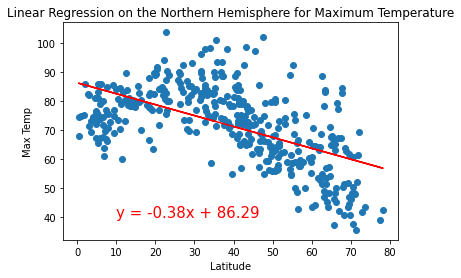

In [17]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Max Temp"]

# Call the function.

plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))
                       

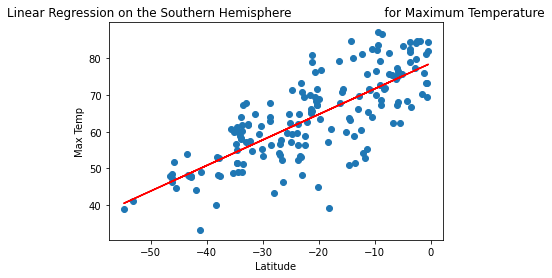

In [18]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Max Temp"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       
                       'Linear Regression on the Southern Hemisphere \
                       for Maximum Temperature', 'Max Temp',(-50,90))

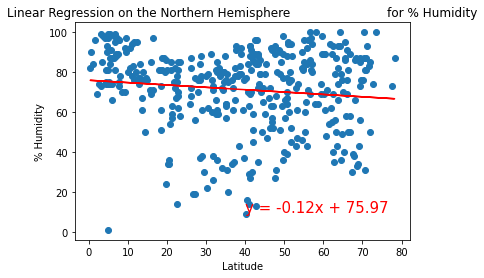

In [19]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Humidity"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

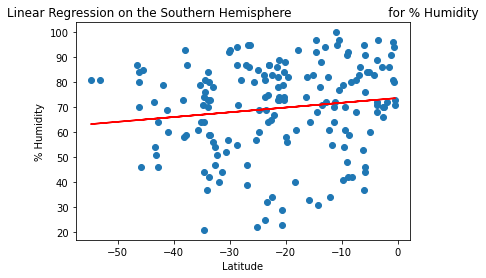

In [20]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Humidity"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))


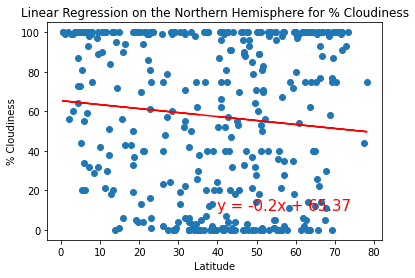

In [21]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Cloudiness"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,10))

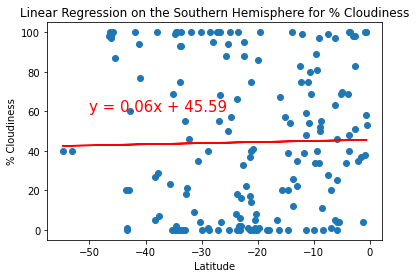

In [22]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Cloudiness"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

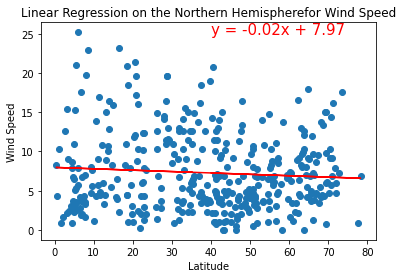

In [23]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Wind Speed"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemispherefor Wind Speed', 'Wind Speed',(40,25))

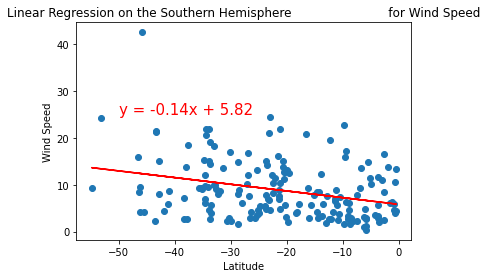

In [24]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Wind Speed"]

# Call the function.

plot_linear_regression(x_values, y_values,
                                                                                                 
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,25))

In [25]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

city_data_df = pd.read_csv("weather_data/cities.csv")

In [26]:
# Extract relevant fields from the DataFrame for plotting.

lats = city_data_df["Lat"]

max_temps = city_data_df["Max Temp"]

humidity = city_data_df["Humidity"]

cloudiness = city_data_df["Cloudiness"]

wind_speed = city_data_df["Wind Speed"]

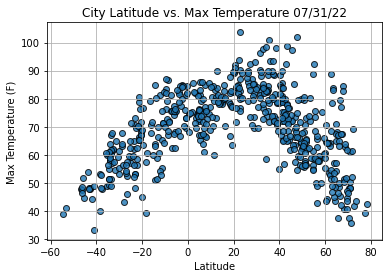

In [27]:
# Import time module

import time

# Build the scatter plot for latitude vs. max temperature.

plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))

plt.ylabel("Max Temperature (F)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig1.png")

# Show plot.

plt.show()

In [28]:
# Build the scatter plots for latitude vs. humidity.

plt.scatter(lhumidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Humidity (%) "+ time.strftime("%x"))

plt.ylabel("Humidity (%)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig2.png")

# Show plot.

plt.show()

NameError: name 'lhumidity' is not defined

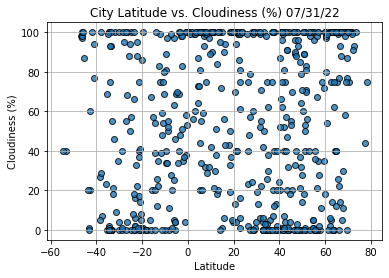

In [29]:
# Build the scatter plots for latitude vs. humidity.

plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))

plt.ylabel("Cloudiness (%)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig3.png")

# Show plot.

plt.show()

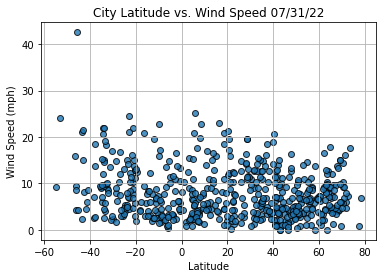

In [30]:
# Build the scatter plots for latitude vs. wind speed.

plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.


plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))

plt.ylabel("Wind Speed (mph)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig4.png")

# Show plot.

plt.show()

In [31]:
index13 = city_data_df.loc[13]

index13

City_ID                        13
City                    Dongsheng
Country                        CN
Date          2022-07-29 01:56:08
Lat                       39.8161
Lng                      109.9776
Max Temp                    78.46
Humidity                       37
Cloudiness                     24
Wind Speed                  18.92
Name: 13, dtype: object

In [32]:
city_data_df["Lat"]>=0

0      False
1       True
2      False
3      False
4      False
       ...  
555     True
556     True
557    False
558     True
559     True
Name: Lat, Length: 560, dtype: bool

In [33]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,1,Sebastian,US,2022-07-29 01:56:03,35.1668,-94.2669,88.39,64,38,4.70
5,5,Victoria,HK,2022-07-29 01:54:18,22.2855,114.1577,93.96,67,99,5.99
6,6,Podgornoye,RU,2022-07-29 01:56:05,51.7350,39.1496,64.62,94,0,6.71
9,9,Obo,CF,2022-07-29 01:56:07,5.3998,26.4869,65.39,99,100,3.53
10,10,Yellowknife,CA,2022-07-29 01:56:07,62.4560,-114.3525,68.52,40,75,9.22


In [34]:
# Import linregress

from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    
    plt.scatter(x_values,y_values)
    
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    plt.title(title)
    
    plt.xlabel('Latitude')
    
    plt.ylabel(y_label)
    
    plt.show()
    

In [35]:
# Create Northern and Southern Hemisphere DataFrames.

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

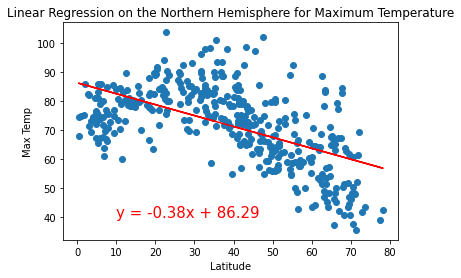

In [36]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Max Temp"]

# Call the function.

plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))
                       

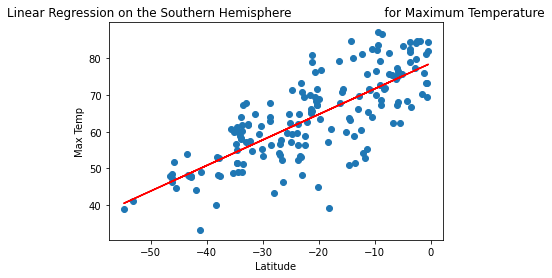

In [37]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Max Temp"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       
                       'Linear Regression on the Southern Hemisphere \
                       for Maximum Temperature', 'Max Temp',(-50,90))

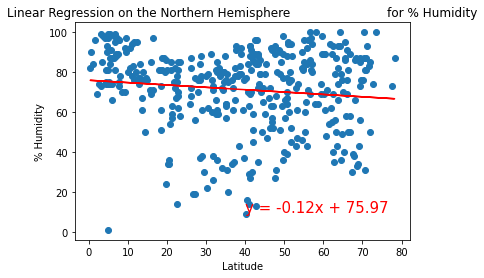

In [38]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Humidity"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

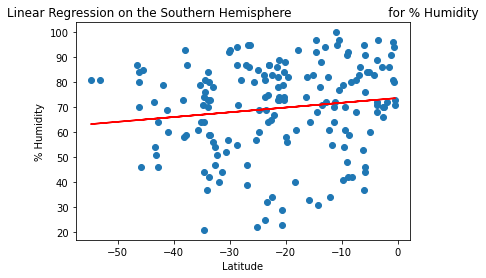

In [39]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Humidity"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))


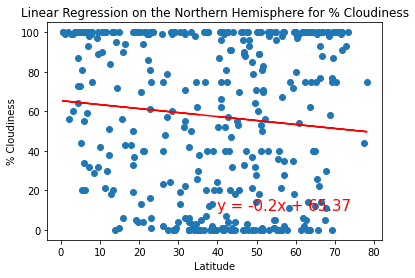

In [40]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Cloudiness"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,10))

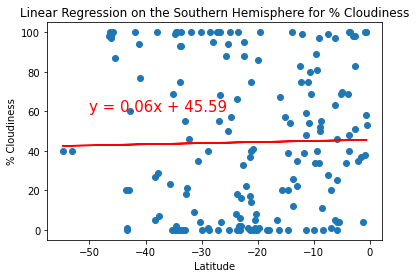

In [41]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Cloudiness"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

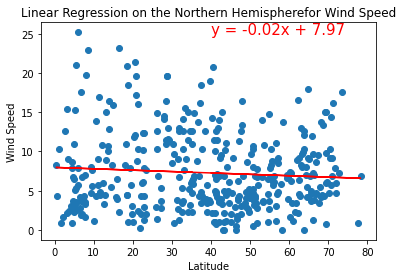

In [42]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Wind Speed"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemispherefor Wind Speed', 'Wind Speed',(40,25))

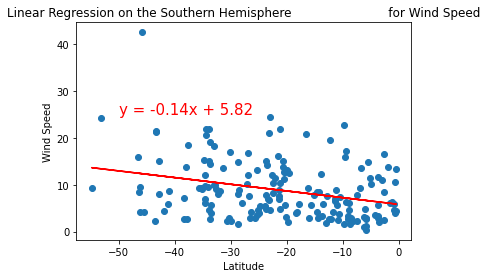

In [43]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Wind Speed"]

# Call the function.

plot_linear_regression(x_values, y_values,
                                                                                                 
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,25))